# 2017 WORLD HAPPINESS REPORT ANALYSIS

## A. Importing, cleaning and numerical summaries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [2]:
df = pd.read_csv('course_project_1.csv')

In [3]:
df.shape

(153, 12)

In [4]:
df.head()

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
0,Malta,27,6.527,1.343280,1.488412,0.821944,0.588767,0.574731,0.153066,1.556863,85.2,Western Europe
1,Zimbabwe,138,3.875,0.375847,1.083096,0.196764,0.336384,0.189143,0.095375,1.597970,56.3,Africa
2,Cyprus,65,5.621,1.355938,1.131363,0.844715,0.355112,0.271254,0.041238,1.621249,88.7,Eastern Europe
3,Iran,108,4.692,1.156873,0.711551,0.639333,0.249323,0.387243,0.048761,1.498735,70.3,Asia-Pacific
4,Mexico,25,6.578,1.153184,1.210862,0.709979,0.412730,0.120990,0.132774,2.837155,82.4,Latin America


In [5]:
df.dtypes

Country              object
Happiness Rank        int64
Happiness Score     float64
Economy             float64
Family              float64
Health              float64
Freedom             float64
Generosity          float64
Corruption          float64
Dystopia            float64
Job Satisfaction    float64
Region               object
dtype: object

In [6]:
#Check if there are any missing values
df.isnull().sum()

Country             0
Happiness Rank      0
Happiness Score     0
Economy             0
Family              0
Health              0
Freedom             0
Generosity          0
Corruption          0
Dystopia            0
Job Satisfaction    2
Region              0
dtype: int64

In [7]:
df[df['Job Satisfaction'].isnull()]

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
43,North Cyprus,61,5.810,1.346911,1.186303,0.834647,0.471204,0.266846,0.155353,1.549158,NaN,Eastern Europe
61,South Sudan,147,3.591,0.397249,0.601323,0.163486,0.147062,0.285671,0.116794,1.879567,NaN,Africa


In [8]:
# remove observations with missing values
df.dropna(inplace=True)

In [9]:
df.shape #check 2 rows have been deleted

(151, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 0 to 152
Data columns (total 12 columns):
Country             151 non-null object
Happiness Rank      151 non-null int64
Happiness Score     151 non-null float64
Economy             151 non-null float64
Family              151 non-null float64
Health              151 non-null float64
Freedom             151 non-null float64
Generosity          151 non-null float64
Corruption          151 non-null float64
Dystopia            151 non-null float64
Job Satisfaction    151 non-null float64
Region              151 non-null object
dtypes: float64(9), int64(1), object(2)
memory usage: 15.3+ KB


In [11]:
df.describe(include=[np.number])

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,77.827815,5.357874,0.983895,1.190509,0.550794,0.409805,0.244914,0.123008,1.854910,75.209934
std,44.934732,1.132826,0.420955,0.286371,0.236116,0.150144,0.135236,0.102776,0.502189,12.962365
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914,44.400000
25%,39.500000,4.505500,0.663371,1.042635,0.369866,0.303677,0.152574,0.056919,1.605148,68.950000
50%,78.000000,5.279000,1.064578,1.253918,0.606042,0.437454,0.230947,0.089283,1.832910,78.100000
75%,116.500000,6.101500,1.314879,1.418162,0.715975,0.519467,0.323762,0.152207,2.161605,85.100000
max,155.000000,7.537000,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485,95.100000


In [12]:
# List the 10 happiest countries, ordered by their happiness score.
df.sort_values(by='Happiness Score', ascending=False).head(10)

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
109,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,94.6,Western Europe
97,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,93.5,Western Europe
47,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,94.5,Western Europe
78,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,93.7,Western Europe
101,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,91.2,Western Europe
105,Netherlands,6,7.377,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804,93.8,Western Europe
81,Canada,7,7.316,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,90.5,North America
5,New Zealand,8,7.314,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456,88.6,Asia-Pacific
148,Australia,10,7.284,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211,89.2,Asia-Pacific
21,Sweden,9,7.284,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538,92.7,Western Europe


In [13]:
# List the 10 least happy countries, ordered by their happiness score.
df.sort_values(by='Happiness Score').head(10)

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
79,Central African Republic,155,2.693,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005,70.4,Africa
40,Burundi,154,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,54.3,Africa
45,Tanzania,153,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,57.8,Africa
39,Syria,152,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,62.7,Asia-Pacific
133,Rwanda,151,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,51.7,Africa
53,Togo,150,3.495,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665,1.837229,44.8,Africa
107,Guinea,149,3.507,0.244550,0.791245,0.194129,0.348588,0.264815,0.110938,1.552312,55.1,Africa
139,Liberia,148,3.533,0.119042,0.872118,0.229918,0.332881,0.266550,0.038948,1.673286,56.6,Africa
138,Yemen,146,3.593,0.591683,0.935382,0.310081,0.249464,0.104125,0.056767,1.345601,58.9,Asia-Pacific
124,Haiti,145,3.603,0.368610,0.640450,0.277321,0.030370,0.489204,0.099872,1.697168,48.5,Latin America


## B. Indexing and grouping

1. Group the data points by region and save them into separate .csv files ex. a Western Europe.csv with all the data for countries in Western Europe and so on for the other 5 regions.

In [14]:
# Set the index
df.set_index('Country', inplace=True)
df.head(1)

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
Country,,,,,,,,,,,
Malta,27,6.527,1.34328,1.488412,0.821944,0.588767,0.574731,0.153066,1.556863,85.2,Western Europe


In [15]:
# Check Region names
df['Region'].unique()

array(['Western Europe', 'Africa', 'Eastern Europe', 'Asia-Pacific',
       'Latin America', 'North America', 'Europe'], dtype=object)

In [16]:
# check if the Region called Europe is relevant, there is already Western and Eastern Europe
df[df['Region']=='Europe']

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
Country,,,,,,,,,,,
Ukraine,132,4.096,0.894652,1.394538,0.575904,0.122975,0.270061,0.023029,0.814382,72.3,Europe


- I reclass Ukraine in Eastern Europe, it is not relevant to keep one country with Europe as a Region

In [17]:
df['Region'].replace({'Europe':'Eastern Europe'}, inplace=True)

In [18]:
print("Ukraine's Region is now ",df.loc['Ukraine','Region'])

Ukraine's Region is now  Eastern Europe


In [19]:
# create one .csv file by Region
for Region, group in df.groupby('Region'):
    group.to_csv('{}.csv'.format(Region))
for Region, group in df.groupby('Region') :
      print({'{}.csv'.format(Region)}, ' has been created')

{'Africa.csv'}  has been created
{'Asia-Pacific.csv'}  has been created
{'Eastern Europe.csv'}  has been created
{'Latin America.csv'}  has been created
{'North America.csv'}  has been created
{'Western Europe.csv'}  has been created


In [20]:
# Compute the mean happiness score for each region and rank the regions from most happy to least happy.
region_Happiness = df.groupby('Region').agg({'Happiness Score': np.mean}).sort_values('Happiness Score', ascending=False)
region_Happiness

,Happiness Score
Region,
North America,7.154500
Western Europe,6.880474
Latin America,5.957818
Eastern Europe,5.435182
Asia-Pacific,5.358326
Africa,4.254581


In [21]:
# Compute the number of countries in each region that have a happiness score above 6.0.
countries_above_6 = df.loc[:,['Region','Happiness Score']].groupby('Region').agg(lambda x: np.sum(x>6) )
countries_above_6

,Happiness Score
Region,
Africa,0.0
Asia-Pacific,11.0
Eastern Europe,1.0
Latin America,13.0
North America,2.0
Western Europe,17.0


In [22]:
# Compute the difference between the maximum and minimum happiness score for each region. Which region has the largest range of happiness scores?
range_happiness =df.groupby('Region')['Happiness Score'].agg(lambda x: float(max(x))-float(min(x))).sort_values(ascending=False).to_frame()
range_happiness.rename(columns={'Happiness Score':'Happiness Score Range'})

,Happiness Score Range
Region,
Asia-Pacific,3.852
Latin America,3.476
Africa,3.179
Western Europe,2.342
Eastern Europe,2.002
North America,0.323


Asia-Pacific has the largest range of happiness score 3.852

## C. Bar plot of the Happiness Score


1. Obtain a horizontal bar plot of the Happiness Score of the top 10 happiest countries. Your bar chart should have the names of the countries are listed vertically along the 
y
-axis and the 
x
-axis should have labels for each number from 
0
 to 
8
. Ensure that the chart has an appropriate title and labels.

In [23]:
top = df.sort_values('Happiness Rank').head(10).copy()
top

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
Country,,,,,,,,,,,
Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,94.6,Western Europe
Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,93.5,Western Europe
Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,94.5,Western Europe
Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,93.7,Western Europe
Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,91.2,Western Europe
Netherlands,6,7.377,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804,93.8,Western Europe
Canada,7,7.316,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,90.5,North America
New Zealand,8,7.314,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456,88.6,Asia-Pacific
Sweden,9,7.284,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538,92.7,Western Europe


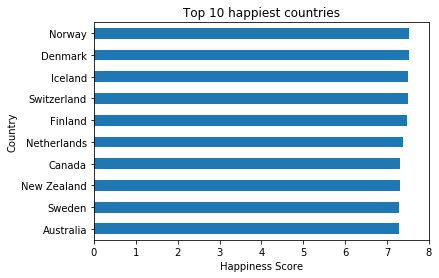

In [24]:
values=top[0:10]['Happiness Score']
bar_plot=values.plot.barh()
bar_plot.set_title('Top 10 happiest countries')
bar_plot.set_xlabel('Happiness Score')
bar_plot.invert_yaxis()
plt.xlim(0,8)
plt.show()

2. You will now modify the horizontal bar chart you obtained in step 1 to turn into a stacked bar chart where the overall happiness score is divided into the seven parts corresponding to the columns:

In [25]:
top10 = df.sort_values('Happiness Rank').head(10).copy()
top10.reset_index(inplace=True)
economy = top10.loc[:,'Economy']
family = top10.loc[:,'Family']
health = top10.loc[:,'Health']
freedom = top10.loc[:,'Freedom']
generosity = top10.loc[:,'Generosity']
corruption = top10.loc[:,'Corruption']
dystopia = top10.loc[:,'Dystopia']
countries= top10.loc[:,'Country']

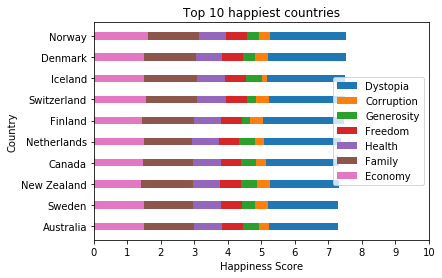

In [26]:
x_cor=np.arange(10)
height = 0.35
plt.barh(x_cor, dystopia, left=economy+family+health+freedom+generosity+corruption, label='Dystopia', height=height)
plt.barh(x_cor, corruption,left=economy+family+health+freedom+generosity, label='Corruption', height=height)
plt.barh(x_cor, generosity, left=economy+family+health+freedom, label='Generosity', height=height)
plt.barh(x_cor,freedom, left=economy+family+health, label='Freedom', height=height)
plt.barh(x_cor,health, left=economy+family, label='Health', height=height)
plt.barh(x_cor,family, left=economy, label='Family', height=height)
plt.barh(x_cor,economy,label='Economy', height=height)
plt.xticks(np.arange(11))
plt.yticks(np.arange(10),countries)
plt.title('Top 10 happiest countries')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.legend(loc='center right')
plt.rcParams["figure.figsize"] = (8,4.5)
plt.gca().invert_yaxis()
plt.show()

Fred version from our video call : 

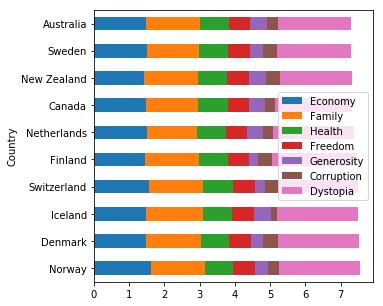

In [27]:
attributes = ['Economy', 'Family', 'Health', 'Freedom', 'Generosity', 'Corruption', 'Dystopia']
top10.set_index('Country')[attributes].plot.barh(stacked=True, figsize=(5,5));

3. Obtain the same stacked horizontal bar chart as in step 2 but this time instead of the top 10 countries consider all countries from the region Africa.

In [28]:
africa=df[df['Region'] == 'Africa'].sort_values('Happiness Rank').copy()
africa.reset_index(inplace=True)
africa.head()

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
0,Algeria,53,5.872,1.091864,1.146217,0.617585,0.233336,0.069437,0.146096,2.567604,68.6,Africa
1,Mauritius,64,5.629,1.189396,1.209561,0.638007,0.491247,0.360934,0.042182,1.697584,86.0,Africa
2,Libya,68,5.525,1.101803,1.357564,0.520169,0.465733,0.152074,0.092610,1.835011,75.8,Africa
3,Morocco,84,5.235,0.878115,0.774864,0.597711,0.408158,0.032210,0.087763,2.456189,64.8,Africa
4,Somalia,93,5.151,0.022643,0.721151,0.113989,0.602127,0.291631,0.282410,3.117485,79.9,Africa


In [29]:
economy = africa.loc[:,'Economy']
family = africa.loc[:,'Family']
health = africa.loc[:,'Health']
freedom = africa.loc[:,'Freedom']
generosity = africa.loc[:,'Generosity']
corruption = africa.loc[:,'Corruption']
dystopia = africa.loc[:,'Dystopia']
countries= africa.loc[:,'Country']

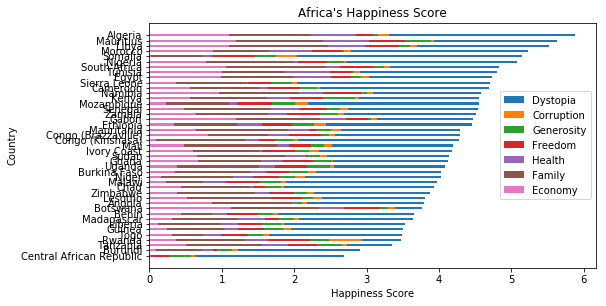

In [30]:
x_cor=np.arange(43)
height = 0.4
plt.barh(x_cor, dystopia, left=economy+family+health+freedom+generosity+corruption, label='Dystopia', height=height)
plt.barh(x_cor, corruption,left=economy+family+health+freedom+generosity, label='Corruption', height=height)
plt.barh(x_cor, generosity, left=economy+family+health+freedom, label='Generosity', height=height)
plt.barh(x_cor,freedom, left=economy+family+health, label='Freedom', height=height)
plt.barh(x_cor,health, left=economy+family, label='Health', height=height)
plt.barh(x_cor,family, left=economy, label='Family', height=height)
plt.barh(x_cor,economy,label='Economy', height=height)
plt.xticks(np.arange(7))
plt.yticks(np.arange(43),countries)
plt.title("Africa's Happiness Score")
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.legend(loc='center right')
plt.rcParams["figure.figsize"] = (12,14)
plt.gca().invert_yaxis()
plt.show()

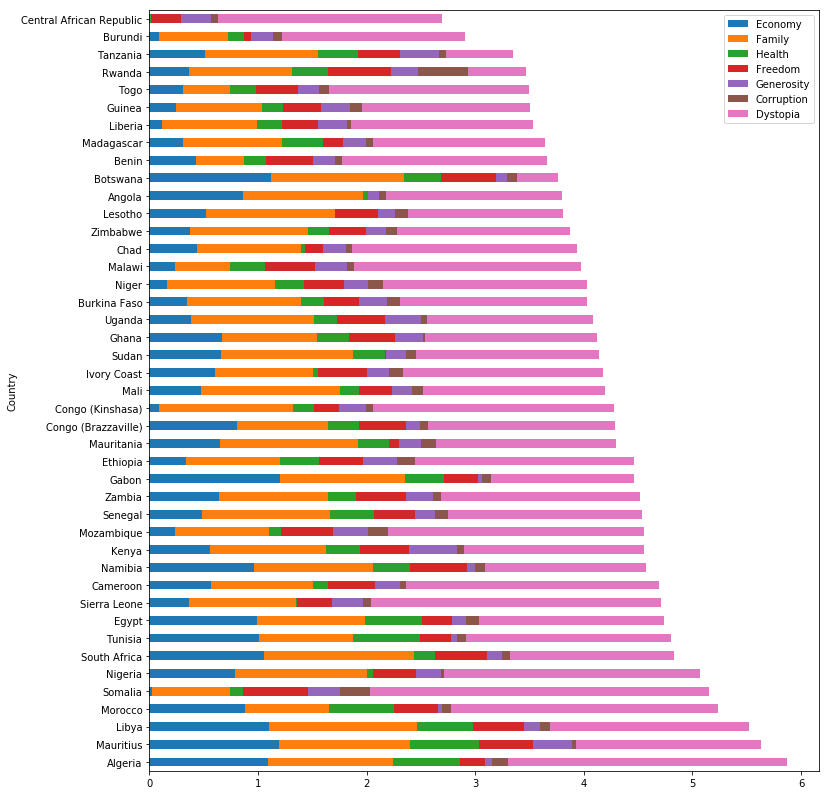

In [31]:
# Pandas plotting Fred
attributes = ['Economy', 'Family', 'Health', 'Freedom', 'Generosity', 'Corruption', 'Dystopia']
africa.set_index('Country')[attributes].plot.barh(stacked=True);

## D. Histogram of Job Satisfaction


1. Obtain a histogram of the Job Satisfaction using the following categories:
40%-50%
50%-60%
60%-70%
70%-80%
80%-90%
90%-100%

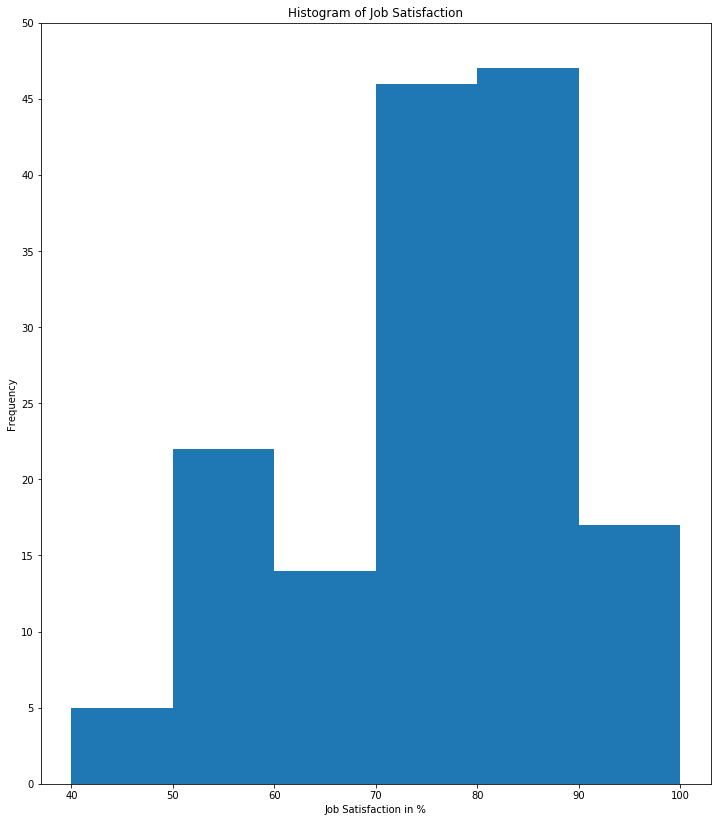

In [32]:
hist=df['Job Satisfaction'].plot.hist(bins=[40,50,60,70,80,90,100])
hist.set_xlabel('Job Satisfaction in %')
hist.set_title('Histogram of Job Satisfaction')
plt.yticks(np.arange(0,51,5))
plt.rcParams["figure.figsize"] = (8,8)
plt.show()

In [33]:
# check if the histogram is correct
hist_df=pd.DataFrame(df['Job Satisfaction'].copy())
hist_df['Job Satisfaction Category'] = pd.cut(hist_df['Job Satisfaction'], bins=[40,50,60,70,80,90,100],labels=['40%-50%', '50%-60%', '60%-70%', '70%-80%', '80%-90%', '90%-100%'])
hist_df.groupby('Job Satisfaction Category').count()

,Job Satisfaction
Job Satisfaction Category,
40%-50%,5
50%-60%,23
60%-70%,14
70%-80%,47
80%-90%,45
90%-100%,17


## E. Pairwise Scatter plots

1. Obtain scatter plots of the Happiness Score versus each of the other variables. Your plots should be displayed as multiple plots table and obtained with one command as opposed to separate commands for each plot.

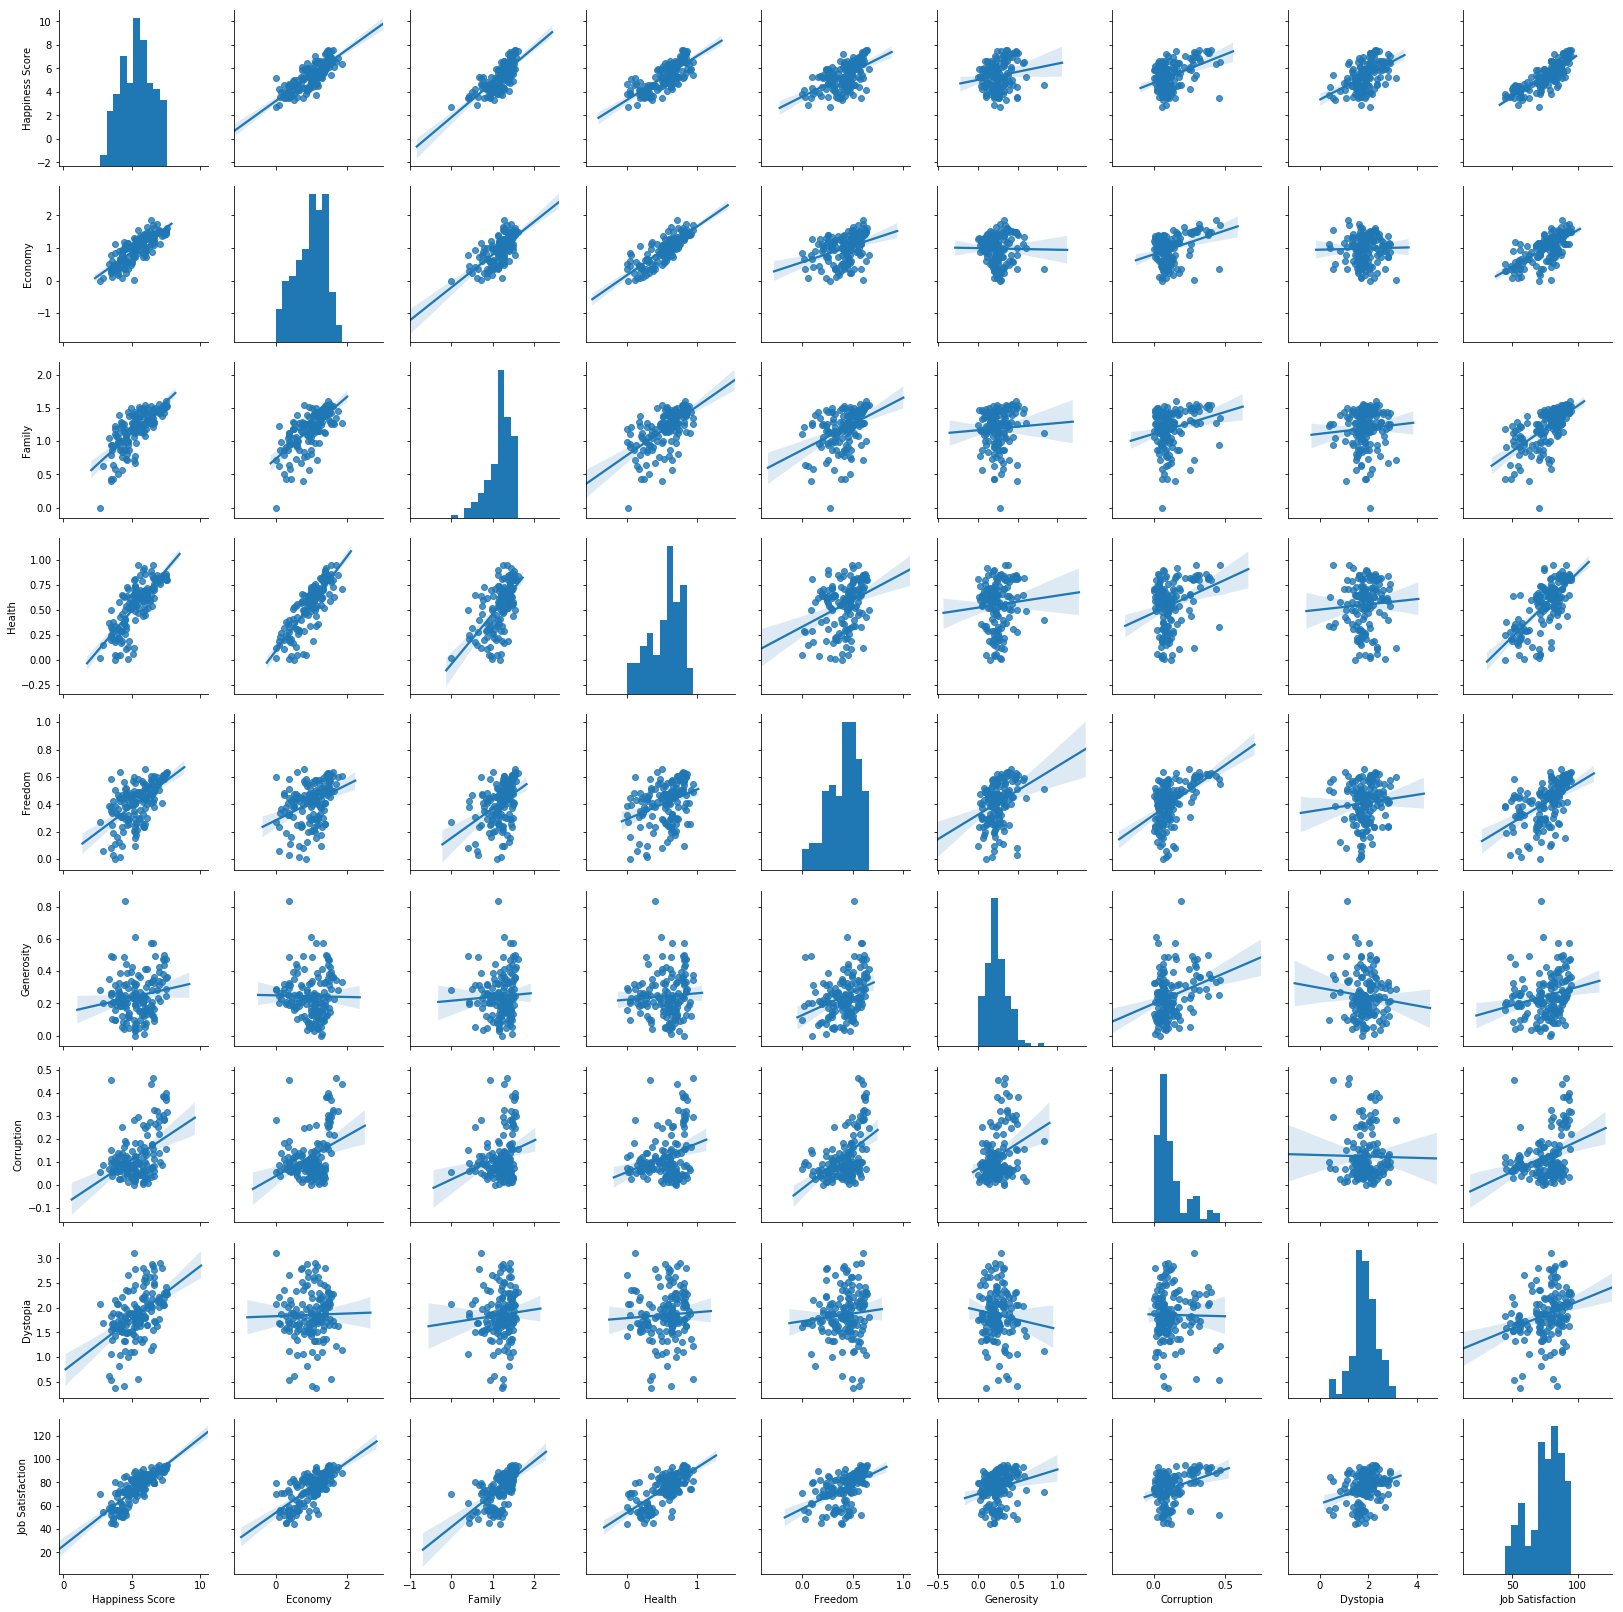

In [34]:
sns.pairplot(df.loc[:,'Happiness Score':'Region'],kind='reg');

## F. Correlation

1. Obtain the correlation between the Happiness Score and each of the other variables. Which variable has the highest correlation with the Happiness Score?

In [35]:
df.corr(method ='kendall')


,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction
Happiness Rank,1.000000,-0.999823,-0.625254,-0.572980,-0.575629,-0.403267,-0.089095,-0.209713,-0.349934,-0.625017
Happiness Score,-0.999823,1.000000,0.625011,0.573081,0.575554,0.402985,0.089287,0.209397,0.350172,0.624951
Economy,-0.625254,0.625011,1.000000,0.516821,0.655806,0.281413,-0.013687,0.160265,0.053598,0.520671
Family,-0.572980,0.573081,0.516821,1.000000,0.453068,0.338631,0.050596,0.139779,0.100574,0.497149
Health,-0.575629,0.575554,0.655806,0.453068,1.000000,0.247682,0.045828,0.114879,0.072848,0.483000
Freedom,-0.403267,0.402985,0.281413,0.338631,0.247682,1.000000,0.240088,0.331391,0.069669,0.420392
Generosity,-0.089095,0.089287,-0.013687,0.050596,0.045828,0.240088,1.000000,0.136600,-0.013157,0.190653
Corruption,-0.209713,0.209397,0.160265,0.139779,0.114879,0.331391,0.136600,1.000000,0.040000,0.190830
Dystopia,-0.349934,0.350172,0.053598,0.100574,0.072848,0.069669,-0.013157,0.040000,1.000000,0.201972
Job Satisfaction,-0.625017,0.624951,0.520671,0.497149,0.483000,0.420392,0.190653,0.190830,0.201972,1.000000


The variable **Economy** has the highest correlation with the Happiness Score. (not considering Happiness Rank because it is not relevant as the Rank is based on the Score)

## G. Probabilities


1. Compute the probability that randomly selected country with Happiness score over 6.0 is from Western Europe. You will have to use pandas to count the appropriate quantities.

- count the number of countries above 6.0
- count the number of Western Europe that are included

In [36]:
countries_above_6

,Happiness Score
Region,
Africa,0.0
Asia-Pacific,11.0
Eastern Europe,1.0
Latin America,13.0
North America,2.0
Western Europe,17.0


In [37]:
#total countries with Happiness Score above 6
countries_above_6.sum()

Happiness Score    44.0
dtype: float64

The expected value is 17/44 = 0.3863

Now I experiment with the folowing code : 

In [38]:
#number of each region above 6
outcome_space=['AP','AP','AP','AP','AP','AP','AP','AP','AP','AP','AP',
               'EE',
               'LA','LA','LA','LA','LA','LA','LA','LA','LA','LA','LA','LA','LA',
              'NA','NA',
              'WE','WE','WE','WE','WE','WE','WE','WE','WE','WE','WE','WE','WE','WE','WE','WE','WE']

experiments = 100000
western_europe = 0
for i in range(experiments):
    result = outcome_space[random.randrange(len(outcome_space))]
    if result == 'WE':
        western_europe += 1
        
probability = western_europe / experiments
print('The probability that randomly selected country with Happiness score over 6.0 is from Western Europe is ', probability, '.')


The probability that randomly selected country with Happiness score over 6.0 is from Western Europe is  0.38588 .


In [39]:
# Teacher (Fred) version from our viso call
above6_filter=df['Happiness Score']>6
df.loc[above6_filter, 'Region'].sample(experiments, replace=True).value_counts(normalize=True)

Western Europe    0.38538
Latin America     0.29462
Asia-Pacific      0.25108
North America     0.04600
Eastern Europe    0.02292
Name: Region, dtype: float64

## H. Matrices


1. Define a matrix whose rows correspond to countries and the columns to the regions. Fill in the matrix with 
0
/
1
 values where entry 
(
i
,
j
)
 is a 
1
 if the country in row 
i
 is in the region in column 
j
 and a 
0
 otherwise.

What I did :
1. Create an array for the rows using Region's column
1. Create an array for the columns with the unique values of the Region's column
1. Use broadcasting and select entries based on boolean  
1. Change the boolean into integers to get 0 and 1 values

In [40]:
A =np.array(df.loc[:,'Region']).reshape(151,1)
B =np.array(df.loc[:,'Region'].unique())
matrix= A==B

In [41]:
matrix = matrix.astype(int)
matrix

array([[1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
 